In [19]:
import numpy as np
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from tsai.all import *
from sklearn.preprocessing import StandardScaler
from utils import *
from sklearn.neighbors import KernelDensity
from scipy.spatial import distance
import scipy as sp
from scipy.stats import multivariate_normal

In [20]:
tc = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/mdist.csv', delimiter=',')

Text(0.5, 1.0, 'Distractions plotted over time')

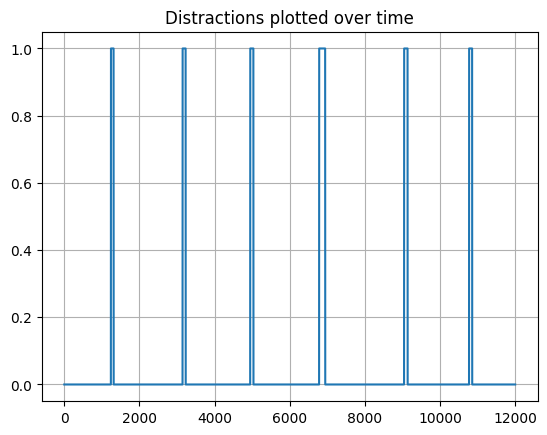

In [21]:
plt.plot(tc[:,10])
plt.grid()
plt.title("Distractions plotted over time")

## Other stuff

In [22]:
data_prn = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRN/e.csv', delimiter=',')

In [23]:
data_prdpe = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/e.csv', delimiter=',') 
distractions = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/mdist.csv', delimiter=',')

In [24]:
means = []
stds = []

# for each run of the first participant (the first four columns of the data)
for i in range(4):
    means.append(np.mean(data_prn[:,i]))
    stds.append(np.std(data_prn[:,i]))
    

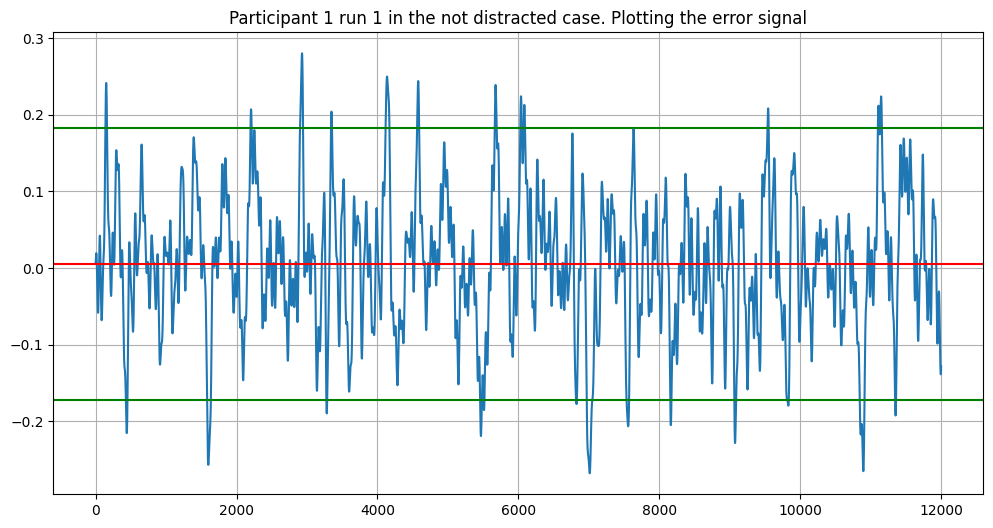

In [25]:
# for each run of the first participant plot the data with the mn and std lines
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(data_prn[:,0])
plt.axhline(y=means[0], color='r', linestyle='-')
plt.axhline(y=means[0] + 2 * stds[0], color='g', linestyle='-')
plt.axhline(y=means[0] - 2 * stds[0], color='g', linestyle='-')
plt.title("Participant 1 run 1 in the not distracted case. Plotting the error signal")
plt.show()

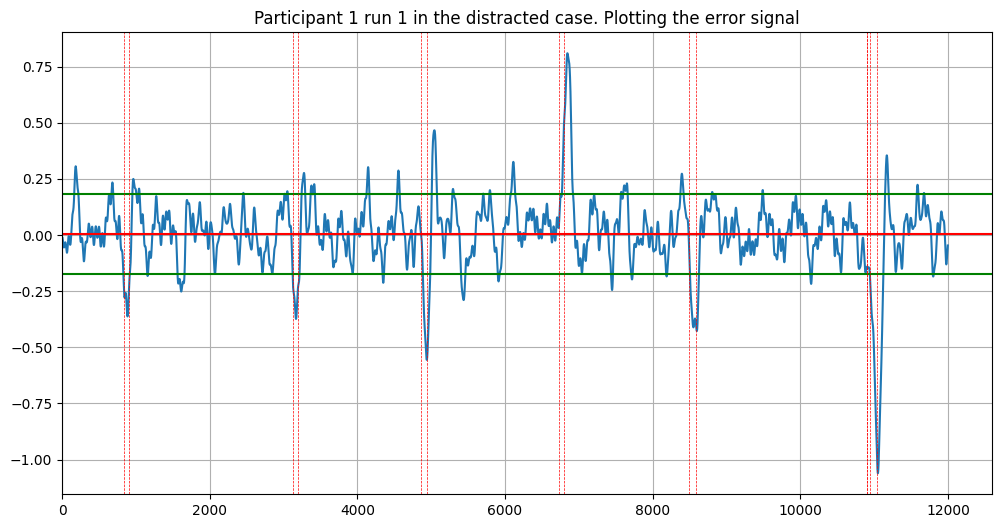

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(data_prdpe[:,0])
plt.axhline(y=means[0], color='r', linestyle='-')
plt.axhline(y=means[0] + 2 * stds[0], color='g', linestyle='-')
plt.axhline(y=means[0] - 2 * stds[0], color='g', linestyle='-')
plt.xlim(left=0)
plt.grid()
cps = np.where(np.diff(distractions[:,0], prepend=np.nan))[0]

# Vertical lines for distractions
for distraction in cps[1:]:
    plt.axvline(x=distraction, color='r', linestyle='--', linewidth=0.5)

plt.title("Participant 1 run 1 in the distracted case. Plotting the error signal")

plt.show()

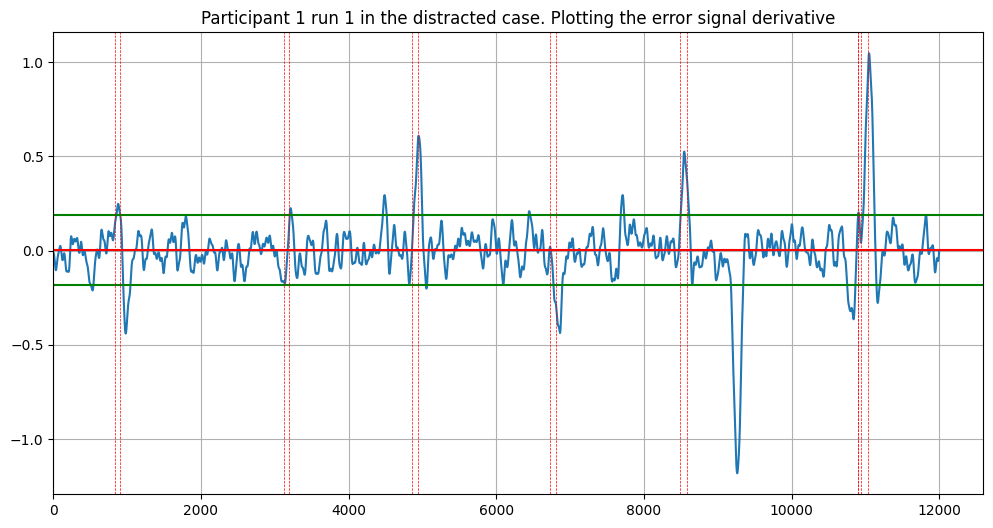

In [27]:
error_derivative_prn = np.diff(data_prn)
std_error_derivative_prn = np.std(error_derivative_prn, axis=0)
means_error_derivative_prn = np.mean(error_derivative_prn, axis=0)

error_derivative = np.diff(data_prdpe)

plt.figure(figsize=(12, 6))
plt.plot(error_derivative[:,0])
plt.axhline(y=means_error_derivative_prn[0], color='r', linestyle='-')
plt.axhline(y=means_error_derivative_prn[0] + 2 * std_error_derivative_prn[0], color='g', linestyle='-')
plt.axhline(y=means_error_derivative_prn[0] - 2 * std_error_derivative_prn[0], color='g', linestyle='-')
plt.xlim(left=0)
plt.grid()
cps = np.where(np.diff(distractions[:,0], prepend=np.nan))[0]

plt.title("Participant 1 run 1 in the distracted case. Plotting the error signal derivative")

# Vertical lines for distractions
for distraction in cps[1:]:
    plt.axvline(x=distraction, color='r', linestyle='--', linewidth=0.5)

plt.show()

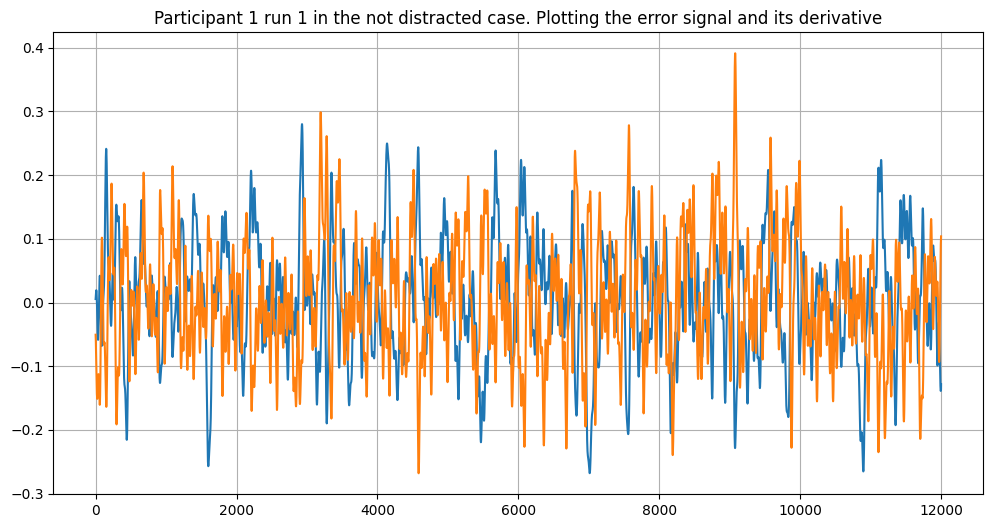

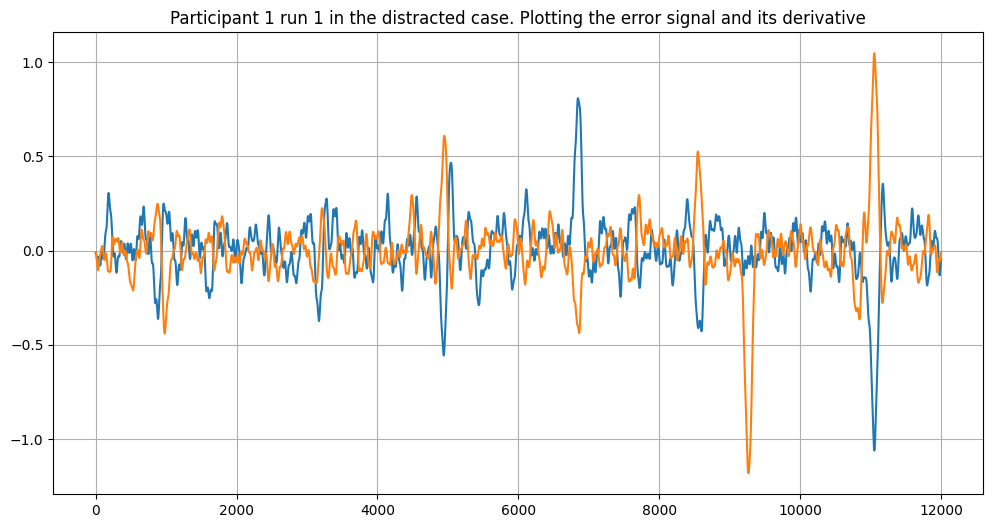

In [29]:
# plot the error and error derivative signals on top of each other. two plots; one in the distracted case and one in the not distracted case
plt.figure(figsize=(12, 6))
plt.plot(data_prn[:,0])
plt.plot(error_derivative_prn[:,0])
plt.grid()
plt.title("Participant 1 run 1 in the not distracted case. Plotting the error signal and its derivative")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data_prdpe[:,0])
plt.plot(error_derivative[:,0])
plt.grid()
plt.title("Participant 1 run 1 in the distracted case. Plotting the error signal and its derivative")
plt.show()


In [31]:
# compute the correlations between the signals and the derivative of the signals
correlations = []
for i in range(4):
    correlations.append(np.corrcoef(data_prn[:,i], error_derivative_prn[:,i])[0,1])

# print the correlation coefficients
print(correlations)

[-0.45444465968706277, -0.3985096255699983, -0.587902739600644, -0.29057493635627085]
